In [1]:
path = 'C:/Users/zbd/Desktop/Amazon/fenci/'

# 读取文件、分词
def get_text():
    f = open(path+'reviews.txt','r',encoding = 'utf-8')
    text = f.read().lower()                                        # 统一改为小写
    for i in '!@#$%^&*()_¯+-;:`~\'"<>=./?,':                       # 替换英文符号为空格
        text = text.replace(i,'') 
    return text.split()                                            # 返回分词结果

lst_1= get_text()  # 分词
print('总共有{}个词'.format(len(lst_1)))   # 统计总词数

# 去除stop_word(常见词)

stop_word_text = open(path+'stop_word.txt','r',encoding = 'utf-8')  # 读取下载的stop_word表
stop_word = stop_word_text.read().split()
stop_word_add = ['a','i','im','it鈥檚','i鈥檓','\\u0026','5鈥','reviewdate']                                                 # 可在该列表中继续添加stop_word
stop_word_new = stop_word + stop_word_add 
#print(stop_word_new)
lst_2 =list(word for word in lst_1 if word not in stop_word_new)
print('去除后总共有{}个词'.format(len(lst_2)))

# 统计词频
counts = {}
for i in lst_2:
    counts[i] = counts.get(i,0) + 1
#print(counts)

word_counts = list(counts.items())
#print(word_counts)

word_counts.sort(key = lambda x:x[1],reverse = True)  # 按词频降序排列

# 输出结果
for i in word_counts[0:50]:
    print(i)




总共有580552个词
去除后总共有228481个词
('fit', 5863)
('love', 4489)
('size', 4367)
('sexy', 4150)
('fits', 3976)
('great', 3934)
('small', 3228)
('soft', 2385)
('ordered', 2343)
('cute', 2337)
('good', 2308)
('material', 2288)
('perfect', 2277)
('nice', 2186)
('comfortable', 2038)
('quality', 2035)
('wear', 1983)
('super', 1904)
('loved', 1806)
('large', 1731)
('color', 1641)
('lingerie', 1542)
('price', 1503)
('pretty', 1481)
('perfectly', 1448)
('big', 1425)
('beautiful', 1382)
('lace', 1358)
('made', 1331)
('bought', 1329)
('medium', 1295)
('expected', 1290)
('top', 1251)
('product', 1106)
('buy', 1051)
('husband', 1045)
('feel', 1045)
('piece', 1028)
('fabric', 947)
('bit', 922)
('flattering', 890)
('wife', 867)
('order', 825)
('loves', 809)
('straps', 798)
('cheap', 793)
('recommend', 775)
('xl', 764)
('item', 753)
('picture', 726)


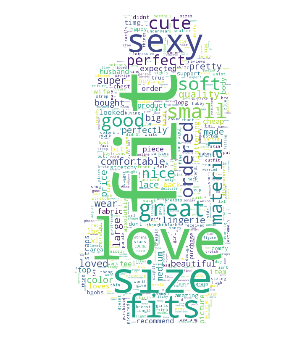

In [10]:
from scipy.misc import imread
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud, ImageColorGenerator


stopwords = {}
# isCN = 0 # 0：英文分词  1：中文分词
path = 'C:/Users/zbd/Desktop/Amazon/fenci/'   
back_coloring_path = path + 'img.jpg'          # 设置背景图片路径
text_path = path +  'reviews.txt'               # 设置要分析的文本路径
stopwords_path = path + 'stop_word.txt'        # 停用词词表
imgname1 = path + 'WordCloudDefautColors.png'  # 保存的图片名字1(只按照背景图片形状) 
imgname2 = path + 'WordCloudColorsByImg.png'   # 保存的图片名字2(颜色按照背景图片颜色布局生成)
#font_path = r'./fonts\simkai.ttf'             # 为matplotlib设置中文字体路径  ----- 主要是中文时使用


back_coloring = imread(back_coloring_path)     # 设置背景图片 ---- back_coloring为3维数组

wc = WordCloud(#font_path = font_path          # 设置字体
                background_color = 'white',    # 设置背景颜色
                max_words = 3000,              # 设置显示的最大词数
                mask = back_coloring,          # 设置背景图片
                max_font_size = 200,           # 设置字体最大值
                min_font_size = 5,             # 设置字体最小值
                random_state = 42,             # 随机有N种配色方案
                width = 1000 , height = 860 ,margin = 2 # 设置图片默认的大小，但是如果使用背景图片的话
                                                        # 那么保存的图片大小会按照其大小保存，margin为词语边缘距离
                )

#wc.generate(text) 
words = {}
for i in word_counts:
    words['{}'.format(i[0])] = i[1]
    
wc.generate_from_frequencies(words) 
# txt_freq例子为 { word1: fre1, word2: fre2,  word3: fre3,......,  wordn: fren }


plt.figure() 

# 以下代码只显示--------形状与背景图片一致，颜色为默认颜色的词云 
plt.imshow(wc) 
plt.axis("off") 
plt.show()             # 绘制词云 
wc.to_file(imgname1)   # 保存图片

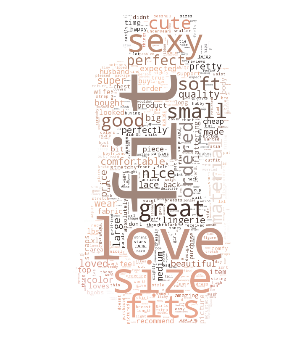

In [11]:
 # 以下代码显示--------形状与背景图片一致，颜色也与背景图颜色一致的词云 
image_colors = ImageColorGenerator(back_coloring)      # 从背景图片生成颜色值 
plt.imshow(wc.recolor(color_func=image_colors)) 
plt.axis("off") 
plt.show() 
wc.to_file( imgname2) 

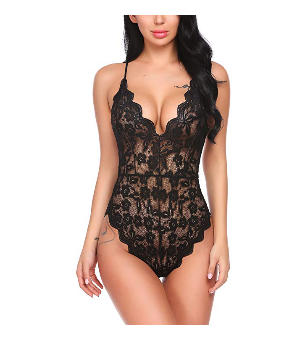

In [7]:
# 显示原图片 
plt.figure()
plt.imshow(back_coloring, cmap=plt.cm.gray) 
plt.axis("off") 
plt.show() # 保存图片